In [2]:
from mlrose_hiive import Knapsack, DiscreteOpt, TravellingSales, TSPOpt, Queens, GeomDecay
from mlrose_hiive.algorithms import random_hill_climb, simulated_annealing, genetic_alg, mimic
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Define Knapsack problem

# weights = [10, 5, 2, 8, 15, 6, 9, 18, 3, 7]
# values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
np.random.seed(42)

# Define the number of items
num_items = 100

# Define the weight capacity of the knapsack
capacity = 10

# Generate random weights and values for each item
weights = np.random.randint(1, 100, size=num_items)
values = np.random.randint(1, 1000, size=num_items)
max_weight_pct = 0.6

fitness_knapsack = Knapsack(weights, values, max_weight_pct)

problem_knapsack = DiscreteOpt(length = 100, fitness_fn = fitness_knapsack, maximize = True)

In [4]:
# Define TSP problem

coords_list = [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0),
               (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6),
               (5, 6), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6),
               (0, 5), (0, 4), (0, 3), (0, 2),
               (1, 2), (2, 2), (3, 2), (4, 2),
               (4, 3), (4, 4), (3, 4), (2, 4), (2, 3)]
fitness_tsp = TravellingSales(coords = coords_list)
problem_tsp = TSPOpt(length = 32, fitness_fn = fitness_tsp, maximize = True)

In [5]:
# Define N-Queens problem

fitness_queens = Queens()
problem_queens = DiscreteOpt(length = 8, fitness_fn = fitness_queens, maximize = True, max_val = 8)

In [6]:
# solve and get data rhc knaosack
start_time = time.time()
best_state_rhc_knapsack, best_fitness_rhc_knapsack, curve_rhc_knapsack = random_hill_climb(problem_knapsack, max_attempts = 1000, restarts = 0, init_state = None, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_rhc_knapsack = np.full((len(curve_rhc_knapsack)), (stop_time - start_time) / len(curve_rhc_knapsack))
time_per_iteration_rhc_knapsack = np.cumsum(time_per_iteration_rhc_knapsack)


In [7]:
# solve and get data rhc tsp
start_time = time.time()
best_state_rhc_tsp, best_fitness_rhc_tsp, curve_rhc_tsp = random_hill_climb(problem_tsp, max_attempts = 100, restarts = 0, init_state = None, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_rhc_tsp = np.full((len(curve_rhc_tsp)), (stop_time - start_time) / len(curve_rhc_tsp))
time_per_iteration_rhc_tsp = np.cumsum(time_per_iteration_rhc_tsp)


In [8]:
# solve and get data rhc queens
start_time = time.time()
best_state_rhc_queens, best_fitness_rhc_queens, curve_rhc_queens = random_hill_climb(problem_queens, max_attempts = 100, max_iters = 1000, restarts = 0, init_state = None, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_rhc_queens = np.full((len(curve_rhc_queens)), (stop_time - start_time) / len(curve_rhc_queens))
time_per_iteration_rhc_queens = np.cumsum(time_per_iteration_rhc_queens)


In [9]:
# solve and get data SA knaosack
start_time = time.time()
best_state_sa_knapsack, best_fitness_sa_knapsack, curve_sa_knapsack = simulated_annealing(problem_knapsack, schedule = GeomDecay(init_temp = 1.0, decay = 0.99, min_temp = 0.001), max_attempts = 100, init_state = None, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_sa_knapsack = np.full((len(curve_sa_knapsack)), (stop_time - start_time) / len(curve_sa_knapsack))
time_per_iteration_sa_knapsack = np.cumsum(time_per_iteration_sa_knapsack)


In [10]:
# solve and get data SA tsp
start_time = time.time()
best_state_sa_tsp, best_fitness_sa_tsp, curve_sa_tsp = simulated_annealing(problem_tsp, schedule = GeomDecay(init_temp = 1.0, decay = 0.99, min_temp = 0.001), max_attempts = 100, init_state = None, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_sa_tsp = np.full((len(curve_sa_tsp)), (stop_time - start_time) / len(curve_sa_tsp))
time_per_iteration_sa_tsp = np.cumsum(time_per_iteration_sa_tsp)


In [11]:
# solve and get data SA queens
start_time = time.time()
best_state_sa_queens, best_fitness_sa_queens, curve_sa_queens = simulated_annealing(problem_queens, schedule = GeomDecay(init_temp = 1.0, decay = 0.99, min_temp = 0.001), max_attempts = 100, init_state = None, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_sa_queens = np.full((len(curve_sa_queens)), (stop_time - start_time) / len(curve_sa_queens))
time_per_iteration_sa_queens = np.cumsum(time_per_iteration_sa_queens)


In [12]:
# solve and get data GA knapsack
start_time = time.time()
best_state_ga_knapsack, best_fitness_ga_knapsack, curve_ga_knapsack = genetic_alg(problem_knapsack, pop_size = 200, mutation_prob = 0.1, max_attempts = 100, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_ga_knapsack = np.full((len(curve_ga_knapsack)), (stop_time - start_time) / len(curve_ga_knapsack))
time_per_iteration_ga_knapsack = np.cumsum(time_per_iteration_ga_knapsack)


In [13]:
# solve and get data GA tsp
start_time = time.time()
best_state_ga_tsp, best_fitness_ga_tsp, curve_ga_tsp = genetic_alg(problem_tsp, pop_size = 200, mutation_prob = 0.1, max_attempts = 100, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_ga_tsp = np.full((len(curve_ga_tsp)), (stop_time - start_time) / len(curve_ga_tsp))
time_per_iteration_ga_tsp = np.cumsum(time_per_iteration_ga_tsp)


In [14]:
# solve and get data GA queens
start_time = time.time()
best_state_ga_queens, best_fitness_ga_queens, curve_ga_queens = genetic_alg(problem_queens, pop_size = 200, mutation_prob = 0.1, max_attempts = 100, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_ga_queens = np.full((len(curve_ga_queens)), (stop_time - start_time) / len(curve_ga_queens))
time_per_iteration_ga_queens = np.cumsum(time_per_iteration_ga_queens)


In [15]:
# solve and get data MIMIC knapsack
start_time = time.time()
best_state_mimic_knapsack, best_fitness_mimic_knapsack, curve_mimic_knapsack = mimic(problem_knapsack, pop_size = 200, keep_pct = 0.2, max_attempts = 100, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_mimic_knapsack = np.full((len(curve_mimic_knapsack)), (stop_time - start_time) / len(curve_mimic_knapsack))
time_per_iteration_mimic_knapsack = np.cumsum(time_per_iteration_mimic_knapsack)


In [16]:
# solve and get data MIMIC tsp
start_time = time.time()
best_state_mimic_tsp, best_fitness_mimic_tsp, curve_mimic_tsp = mimic(problem_tsp, pop_size = 200, keep_pct = 0.2, max_attempts = 100, max_iters = 1000, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_mimic_tsp = np.full((len(curve_mimic_tsp)), (stop_time - start_time) / len(curve_mimic_tsp))
time_per_iteration_mimic_tsp = np.cumsum(time_per_iteration_mimic_tsp)


In [17]:
# solve and get data MIMIC queens
start_time = time.time()
best_state_mimic_queens, best_fitness_mimic_queens, curve_mimic_queens = mimic(problem_queens, pop_size = 200, keep_pct = 0.2, max_attempts = 100, max_iters = 1000, curve = True, random_state = 1)
stop_time = time.time()
time_per_iteration_mimic_queens = np.full((len(curve_mimic_queens)), (stop_time - start_time) / len(curve_mimic_queens))
time_per_iteration_mimic_queens = np.cumsum(time_per_iteration_mimic_queens)


In [18]:
# Plot the results



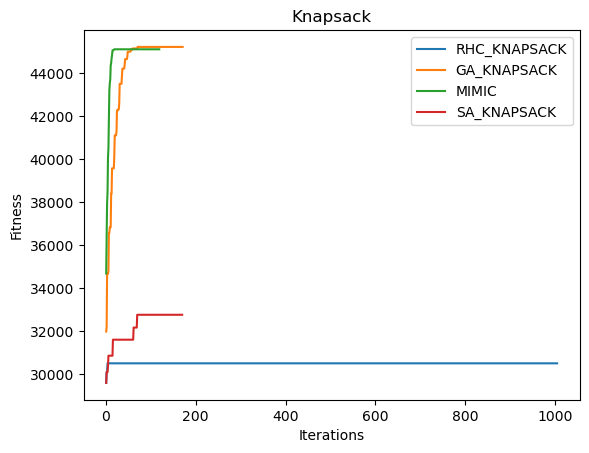

In [19]:
# plot knapsack

plt.plot(np.arange(1, len(curve_rhc_knapsack) + 1), curve_rhc_knapsack[:,0], label = 'RHC_KNAPSACK')
plt.plot(np.arange(1, len(curve_ga_knapsack) + 1), curve_ga_knapsack[:,0], label = 'GA_KNAPSACK')
plt.plot(np.arange(1, len(curve_mimic_knapsack) + 1), curve_mimic_knapsack[:,0], label = 'MIMIC')
plt.plot(np.arange(1, len(curve_sa_knapsack) + 1), curve_sa_knapsack[:,0], label = 'SA_KNAPSACK')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Knapsack')
plt.show()

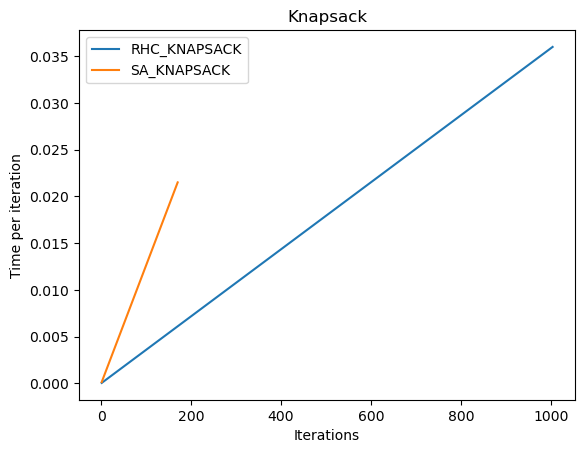

In [31]:
# plot knapsack time

plt.plot(np.arange(1, len(curve_rhc_knapsack) + 1), time_per_iteration_rhc_knapsack, label = 'RHC_KNAPSACK')
# plt.plot(np.arange(1, len(curve_ga_knapsack) + 1), time_per_iteration_ga_knapsack, label = 'GA_KNAPSACK')
# plt.plot(np.arange(1, len(curve_mimic_knapsack) + 1), np.divide(time_per_iteration_mimic_knapsack, 10000), label = 'MIMIC')
plt.plot(np.arange(1, len(curve_sa_knapsack) + 1), time_per_iteration_sa_knapsack, label = 'SA_KNAPSACK')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Time per iteration')
plt.title('Knapsack')
plt.show()

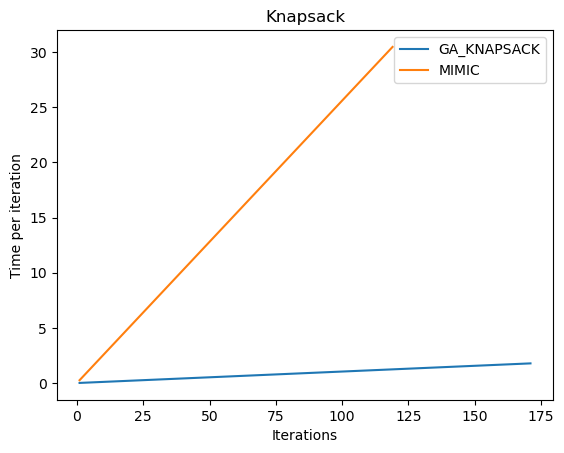

In [34]:
# plot knapsack time

# plt.plot(np.arange(1, len(curve_rhc_knapsack) + 1), time_per_iteration_rhc_knapsack, label = 'RHC_KNAPSACK')
plt.plot(np.arange(1, len(curve_ga_knapsack) + 1), time_per_iteration_ga_knapsack, label = 'GA_KNAPSACK')
plt.plot(np.arange(1, len(curve_mimic_knapsack) + 1), np.divide(time_per_iteration_mimic_knapsack, 10), label = 'MIMIC')
# plt.plot(np.arange(1, len(curve_sa_knapsack) + 1), time_per_iteration_sa_knapsack, label = 'SA_KNAPSACK')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Time per iteration')
plt.title('Knapsack')
plt.show()

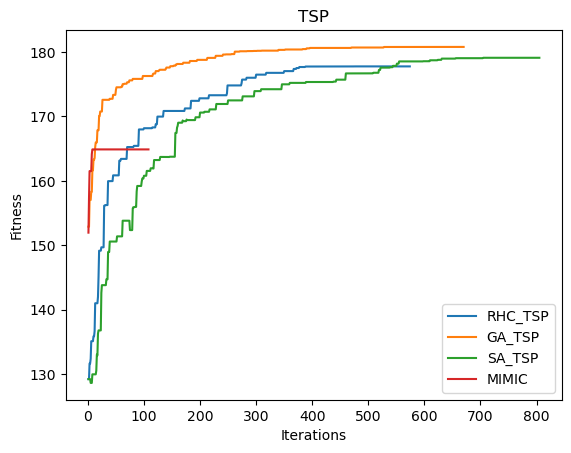

In [57]:
# plot tsp

plt.plot(np.arange(1, len(curve_rhc_tsp) + 1), curve_rhc_tsp[:,0], label = 'RHC_TSP')
plt.plot(np.arange(1, len(curve_ga_tsp) + 1), curve_ga_tsp[:,0], label = 'GA_TSP')
plt.plot(np.arange(1, len(curve_sa_tsp) + 1), curve_sa_tsp[:,0], label = 'SA_TSP')
plt.plot(np.arange(1, len(curve_mimic_tsp) + 1), curve_mimic_tsp[:,0], label = 'MIMIC')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('TSP')
plt.show()

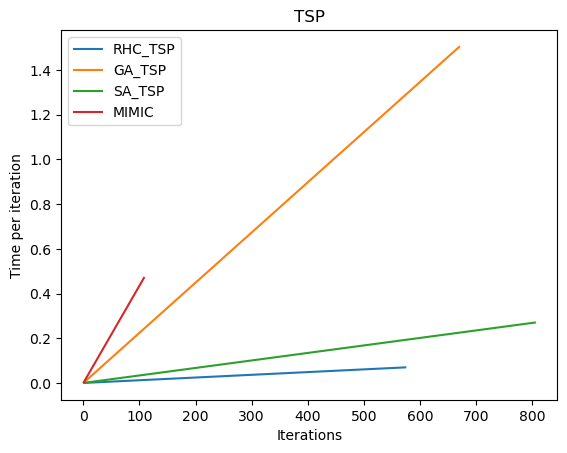

In [37]:
# plot tsp time

plt.plot(np.arange(1, len(curve_rhc_tsp) + 1), time_per_iteration_rhc_tsp, label = 'RHC_TSP')
plt.plot(np.arange(1, len(curve_ga_tsp) + 1), np.divide(time_per_iteration_ga_tsp, 10), label = 'GA_TSP')
plt.plot(np.arange(1, len(curve_sa_tsp) + 1), time_per_iteration_sa_tsp, label = 'SA_TSP')
plt.plot(np.arange(1, len(curve_mimic_tsp) + 1), np.divide(time_per_iteration_mimic_tsp, 100), label = 'MIMIC')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Time per iteration')
plt.title('TSP')
plt.show()

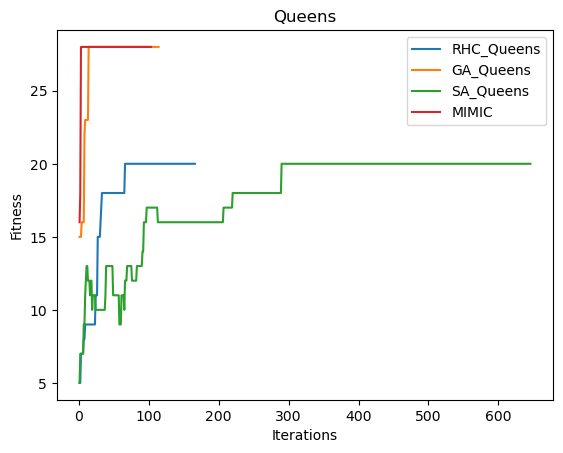

In [59]:
# plot queens

plt.plot(np.arange(1, len(curve_rhc_queens) + 1), curve_rhc_queens[:,0], label = 'RHC_Queens')
plt.plot(np.arange(1, len(curve_ga_queens) + 1), curve_ga_queens[:,0], label = 'GA_Queens')
plt.plot(np.arange(1, len(curve_sa_queens) + 1), curve_sa_queens[:,0], label = 'SA_Queens')
plt.plot(np.arange(1, len(curve_mimic_queens) + 1), curve_mimic_queens[:,0], label = 'MIMIC')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Queens')
plt.show()

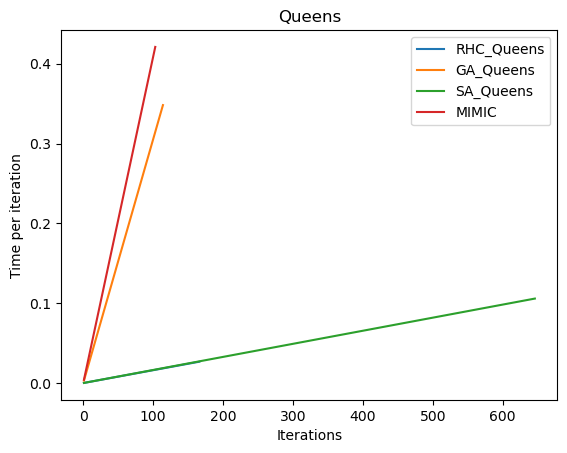

In [155]:
# plot queens time

plt.plot(np.arange(1, len(curve_rhc_queens) + 1), time_per_iteration_rhc_queens, label = 'RHC_Queens')
plt.plot(np.arange(1, len(curve_ga_queens) + 1), np.divide(time_per_iteration_ga_queens, 10), label = 'GA_Queens')
plt.plot(np.arange(1, len(curve_sa_queens) + 1), time_per_iteration_sa_queens, label = 'SA_Queens')
plt.plot(np.arange(1, len(curve_mimic_queens) + 1), np.divide(time_per_iteration_mimic_queens, 10), label = 'MIMIC')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Time per iteration')
plt.title('Queens')
plt.show()